# COVID-19 OPEN RESEARCH DATASET

In [1]:
import os
import json
import pandas as pd

In [2]:
%cd '/home/myilmaz/devel/covid551982_1475446_bundle_archive/'

/home/myilmaz/devel/covid551982_1475446_bundle_archive


## Papers  researching chronic kidney disease as a comorbidity risk

In [3]:
kags=pd.DataFrame(None)
for i in os.listdir('Kaggle/target_tables/8_risk_factors/'):
    kag=pd.read_csv('Kaggle/target_tables/8_risk_factors/'+i)
    kags=kags.append(kag)

In [4]:
kags.head()

,Unnamed: 0,Date,Study,Study Link,Journal,Severe,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,...,Fatality Calculated,Multivariate adjustment,Study Type,Sample Size,Study Population,Added on,Critical only,Discharged vs. death?,Critical only?,Discharge vs. death?
0,0,2020-06-01,Characteristics and Outcomes of COVID-19 Patie...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,NaN,NaN,NaN,NaN,NaN,...,Calculated,NaN,Retrospective observational study,13442,New York City Health and Hospital between Marc...,NaN,N,N,NaN,NaN
1,1,2020-05-22,Interim Analysis of Risk Factors for Severe Ou...,http://medrxiv.org/cgi/content/short/2020.05.1...,MedRxiv,RR 1.29,1.13,1.47,NaN,Significant,...,Extracted,"age, sex, race/ethnicity, smoker, hypertension...",Retrospective observational study,2490,124 counties located in 14 states 113 (Califor...,NaN,Y,N,NaN,NaN
2,2,2020-05-22,Interim Analysis of Risk Factors for Severe Ou...,http://medrxiv.org/cgi/content/short/2020.05.1...,MedRxiv,RR 1.39,1.22,1.58,NaN,Significant,...,Extracted,NaN,Retrospective observational study,2490,123 counties located in 14 states 113 (Califor...,NaN,Y,N,NaN,NaN
3,3,2020-05-07,OpenSAFELY: factors associated with COVID-19-r...,http://medrxiv.org/cgi/content/short/2020.05.0...,MedRxiv,NaN,NaN,NaN,NaN,NaN,...,Extracted,"age, gender, obesity, smoking status, diabetes...",Retrospective observational study,"17,425,445",TPP general practice in England from February ...,NaN,N,N,NaN,NaN
4,4,2020-04-25,The role of comorbidities and clinical predict...,http://doi.org/10.1101/2020.04.21.20074633,NaN,OR 1.08,0.18,6.26,NaN,Not Significant,...,NaN,NaN,Systematic review and meta-analysis,3 studies,"PubMed, Scopus, EMBASE, Web of Science, and Go...",5/6/2020,Y,N,NaN,NaN


In [5]:
%ls document_parses

comorbidity.ipynb  covid-Copy1.ipynb  covid.ipynb  pdf_json/  pmc_json/


In [6]:
keep=['Epidemiology, clinical course, and outcomes of critically ill adults with COVID-19 in New York City: a prospective cohort study','Psychiatric Predictors of COVID-19 Outcomes in a Skilled Nursing Facility Cohort','COVID-19 in Iran, a comprehensive investigation from exposure to treatment outcomes']
arts=set(kags['Study'])-set(keep)

In [7]:
os.path.getsize('document_parses/pdf_json')/1000000

8.634368

In [8]:
docs=[]
alltext=[]
for i in os.listdir('document_parses/pdf_json'):
    save=0
    savee=0

    with open('document_parses/pdf_json/'+i) as json_file:
        data = json.load(json_file)
        if data['metadata']['title'] in list(arts):
            print(data['metadata']['title'])
            doc=[]
            text=''
            for c,j in enumerate(data['body_text']):
            
          
                row=[i,data['metadata']['title'],data['body_text'][c]['section'],data['body_text'][c]['text']]

                doc.append(row)
                text+=data['body_text'][c]['text']
            
            if doc not in docs:
                docs.append(doc)
                alltext.append(text)
        else:
            pass

When a nephrology ward becomes a COVID-19 ward: the Cremona experience
Prognostic value of NT-proBNP in patients with severe COVID-19
Obesity as a risk factor for poor outcome in COVID-19-induced lung injury: the potential role of undiagnosed obstructive sleep apnoea
Association between ABO blood groups and clinical outcome of coronavirus disease 2019: Evidence from two cohorts
COVID-19 in solid organ transplant recipients: Initial report from the US epicenter
Cardiovascular Diseases and COVID-19 Mortality and Intensive Care Unit Admission: A Systematic Review and Meta-analysis
Characteristics of COVID-19 infection in Beijing
Prediction for Progression Risk in Patients with COVID-19 Pneumonia: the CALL Score
Pre-Existing Characteristics Associated with Covid-19 Illness Severity
Clinical characteristics of 2019 novel coronavirus infection in China
Key to successful treatment of COVID-19: accurate identification of severe risks and early intervention of disease progression
Neurological M

Characteristics and outcomes of patients hospitalized for COVID-19 and cardiac disease in Northern Italy
Association between Cardiovascular Burden and Requirement of Intensive Care among Patients with Mild COVID-19
Covid-19 by Race and Ethnicity: A National Cohort Study of 6 Million United States Veterans
Phenotypic characteristics and prognosis of inpatients with COVID-19 and diabetes: the CORONADO study
Risk Factors Associated with Clinical Outcomes in 323 COVID-19 Patients in Wuhan, China
Association between Cardiovascular Burden and Requirement of Intensive Care among Patients with Mild COVID-19
Age-adjusted associations between comorbidity and outcomes of COVID-19: a review of the evidence
Host susceptibility to severe COVID-19 and establishment of a host risk score: findings of 487 cases outside Wuhan
Characteristics of patients with COVID-19 during epidemic ongoing outbreak in Wuhan, China
Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Ch

In [10]:
jsons=[j[0] for i in docs for j in i]
titles=[j[1] for i in docs for j in i]
sections=[j[2] for i in docs for j in i]
text=[j[1]+'.  '+j[2]+'.  '+j[3] for i in docs for j in i]
creats=pd.DataFrame(None,columns=['jsons','titles','sections','text'])

In [11]:
creats=pd.DataFrame(None,columns=['jsons','titles','sections','text'])
creats.jsons=jsons
creats.titles=titles
creats.sections=sections
creats.text=text

In [12]:
docs=creats.copy(deep=True)
docs.drop_duplicates(keep='first',inplace=True)
# NUMBER OF UNIQUE DOCUMENTS IN THE DATA SET
docs['jsons'].nunique()


98

In [13]:
docs.to_csv('comorbids.csv')
docs=pd.read_csv('comorbids.csv')

In [14]:
import numpy as np
np.min([len(i) for i in alltext])
np.max([len(i) for i in alltext])

print('Average document length is {} words'.format(np.mean([len(i) for i in alltext])))


Average document length is 16896.051020408162 words


## Use pretrained NER model to find Problems, Tests, and Treatments

In [15]:
import os


import pyspark.sql.functions as F
from pyspark.sql.functions import monotonically_increasing_id
import json
import os
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession


from sparknlp.annotator import *

from sparknlp.base import *

# Install pyspark
! pip install --ignore-installed -q pyspark==2.4.4


# Install Spark NLP
! pip install --ignore-installed -q spark-nlp==2.5


import sparknlp

print (sparknlp.version())

import json
import os
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from sparknlp.annotator import *

from sparknlp.base import *

from pyspark.sql.functions import monotonically_increasing_id
import pyspark.sql.functions as F
import pyspark.sql.types as t




You should consider upgrading via the '/home/myilmaz/devel/mag/notebooks/3.7env/bin/python -m pip install --upgrade pip' command.
ERROR: spark-nlp-jsl 2.5.4rc4 has requirement spark-nlp==2.5.4, but you'll have spark-nlp 2.5.0 which is incompatible.
You should consider upgrading via the '/home/myilmaz/devel/mag/notebooks/3.7env/bin/python -m pip install --upgrade pip' command.
2.5.0


In [16]:
spark=sparknlp.start()

In [17]:
docs.fillna('',inplace=True)

In [18]:
docs.head(1)

,Unnamed: 0,jsons,titles,sections,text
0,0,5111c718f426624c7bcb8f11d7137177f6e85bf3.json,When a nephrology ward becomes a COVID-19 ward...,,When a nephrology ward becomes a COVID-19 ward...


In [19]:
sparkdocs=spark.createDataFrame(docs).toDF('index','docid','title','section','sectionNo','text')

In [20]:
document_assembler = DocumentAssembler() \
        .setInputCol("text")\
        .setOutputCol('document')
    
sentence_detector = SentenceDetector() \
        .setInputCols(["document"]) \
        .setOutputCol("sentence")

tokenizer = Tokenizer() \
        .setInputCols(["sentence"]) \
        .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.load("/home/myilmaz/cache_pretrained/embeddings_clinical_en_2.4.0_2.4_1580237286004")\
  .setInputCols(["sentence", "token"])\
  .setOutputCol("embeddings")
clinical_ner = NerDLModel.load('/home/myilmaz/cache_pretrained/ner_clinical_en_2.4.0_2.4_1580237286004') \
        .setInputCols(["sentence", "token", "embeddings"]) \
        .setOutputCol("ner")
ner_converter = NerConverter() \
  .setInputCols(["sentence", "token", "ner"]) \
  .setOutputCol("ner_chunk")
nlpPipeline = Pipeline(stages=[document_assembler,sentence_detector,tokenizer,
    word_embeddings,
    clinical_ner,ner_converter
    ])


empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)


In [21]:
results=model.transform(sparkdocs)

In [22]:
results.columns

['index',
 'docid',
 'title',
 'section',
 'text',
 'document',
 'sentence',
 'token',
 'embeddings',
 'ner',
 'ner_chunk']

In [23]:
exploded = results.select('docid','section','sectionNo',F.explode(F.arrays_zip('token.metadata','token.result','ner.result')).alias("cols")) \
        .select('docid','section',F.expr("cols['0'].sentence").alias("sentid"),
        F.col('cols.1').alias("token"),F.col('cols.2').alias("label"))

## Save annotated documents for further analysis

In [26]:
exploded.write.option("header", "true").csv("comorbids2.csv")

In [27]:
os.listdir('comorbids2.csv')[0]

'part-00003-21964242-2911-42c3-832d-aca49b1ae235-c000.csv'

In [28]:
import pyspark.sql.types as t
myschema = t.StructType(
   [
    t.StructField('docid', t.StringType(), True),
    t.StructField('section', t.StringType(), True),
    t.StructField('sentid', t.IntegerType(), True),
    t.StructField('token', t.StringType(), True),
    t.StructField('label', t.StringType(), True)

   ]
  )

In [29]:
csvs=os.listdir('comorbids2.csv')
big=pd.DataFrame(None)
for i in csvs:
    
    dfs=spark.read.csv('comorbids2.csv/'+i,sep=',',schema=myschema,header=True)
    one=dfs.toPandas()
    big=big.append(one)

In [30]:
big.head()

,docid,section,sentid,token,label
0,dbdc9a54181e01c796a26bfffd1bbf423c863407.json,Background,0,Clinical,O
1,dbdc9a54181e01c796a26bfffd1bbf423c863407.json,Background,0,course,O
2,dbdc9a54181e01c796a26bfffd1bbf423c863407.json,Background,0,and,O
3,dbdc9a54181e01c796a26bfffd1bbf423c863407.json,Background,0,outcome,O
4,dbdc9a54181e01c796a26bfffd1bbf423c863407.json,Background,0,of,O


In [31]:
import numpy as np

tokens=[]
savei=''
save=0
for i,j in zip(big.token,big.label):
    if j.split('-')[0]!='I':
        if save<0:
            tokens[save]=savei
            tokens.append(np.nan)
            savei=i
            save=0
            continue
        else:
            tokens.append(savei)
            savei=i
            save=0
            continue
    elif j.split('-')[0]=='I':
        savei+=' '+i
        save-=1
        tokens.append(np.nan)
    else:
        tokens.append(np.nan)

               
if save<0:
    tokens[save]=savei
    tokens.append(np.nan)
else:
    tokens.append(savei) 
    
tokens=tokens[1:]
        

In [32]:
big['chunks']=tokens

In [33]:
bigdf=big[big['chunks'].notnull()]

In [34]:
bigdf=bigdf[bigdf['label']!='O']

In [35]:
bigdf['chunks'].value_counts()

death                                                                                          335
diabetes                                                                                       330
SARS-CoV-2                                                                                     261
hypertension                                                                                   235
comorbidities                                                                                  234
                                                                                              ... 
lymphocyte infiltration in lungs                                                                 1
honeycomb-like thickening of the interlobular septa and subsegmental areas of consolidation      1
an ACEi                                                                                          1
current smokers                                                                                  1
early stud

## Prep for visualizations

In [36]:
problems=bigdf[bigdf['label']=='B-PROBLEM']

In [37]:
tests=bigdf[bigdf['label']=='B-TEST']

In [38]:
#len(problems[problems['chunks']=='proteinuria'])

In [39]:
probhist=pd.DataFrame(problems['chunks'].value_counts())
probhist=probhist.rename(columns={'chunks':'counts'})
probhist2=probhist.iloc[0:100]

In [40]:
testhist=pd.DataFrame(tests['chunks'].value_counts())
testhist=testhist.rename(columns={'chunks':'counts'})
testhist2=testhist.iloc[0:100]

## Look at most frequent "Test" entities

In [41]:
testhist2.head(40)

,counts
this study,220
our study,150
the study,115
studies,113
CI,111
meta-analysis,110
CRP,99
Statistical analysis,96
a retrospective cohort study,85
the CORONADO study,79


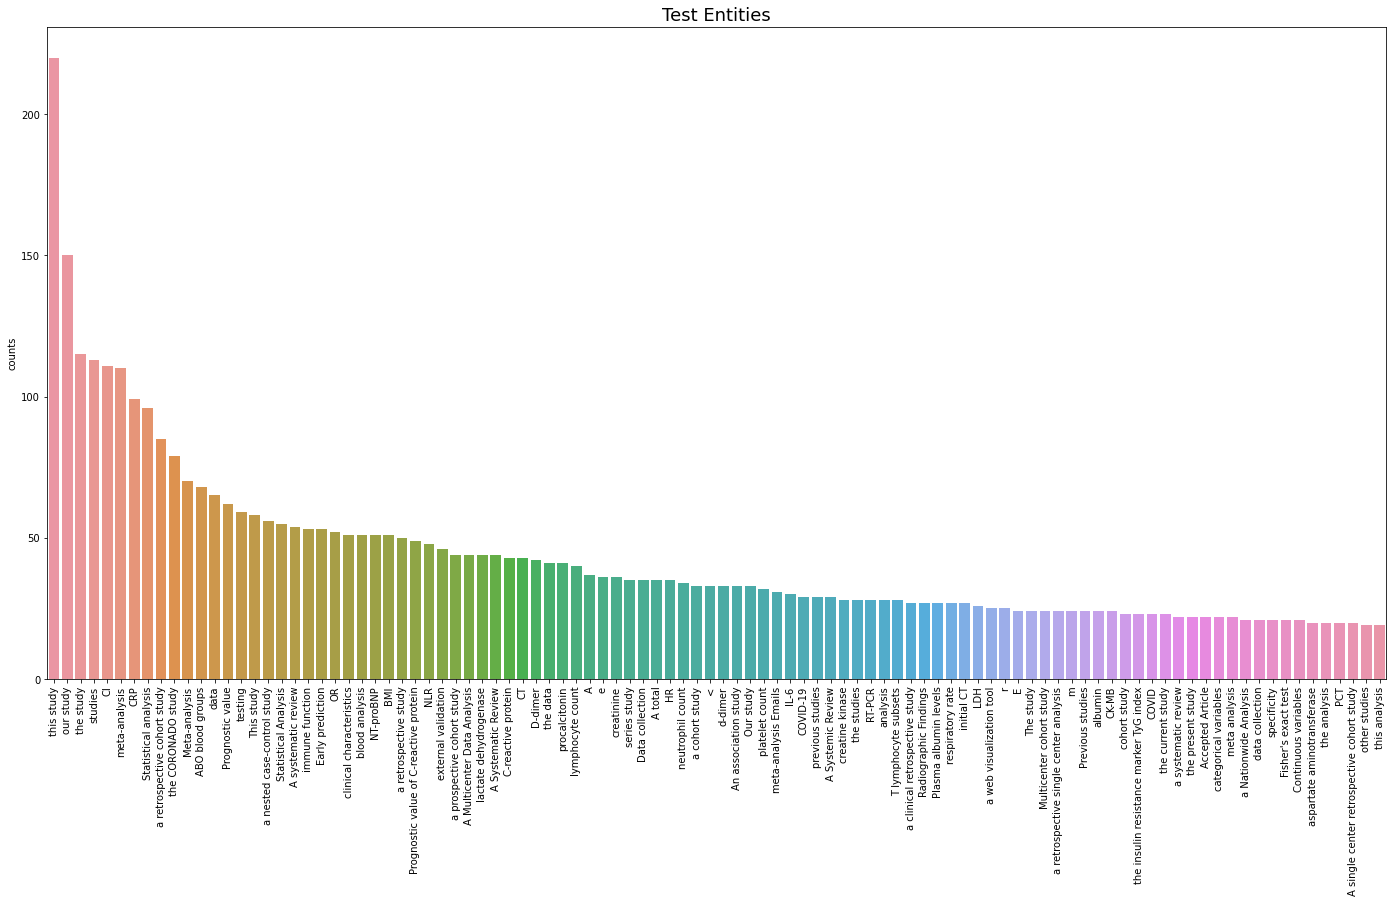

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize =(24,12))
chart=sns.barplot(testhist2.index,testhist2['counts'])
chart.set_xticklabels(testhist2.index,rotation=90)
plt.title('Test Entities',fontsize=18)
plt.show()

The pretrained model is returning a lot of false positive for Test entities, but you can still see that kidney related tests such as "creatinine" are well represented in the dataset.

## Look at most frequent "Problem" entities

In [43]:
probhist2.head(40)

,counts
death,330
diabetes,328
hypertension,235
SARS-CoV-2,235
comorbidities,232
pneumonia,148
coronavirus disease,146
severe COVID-19,137
fever,137
obesity,132


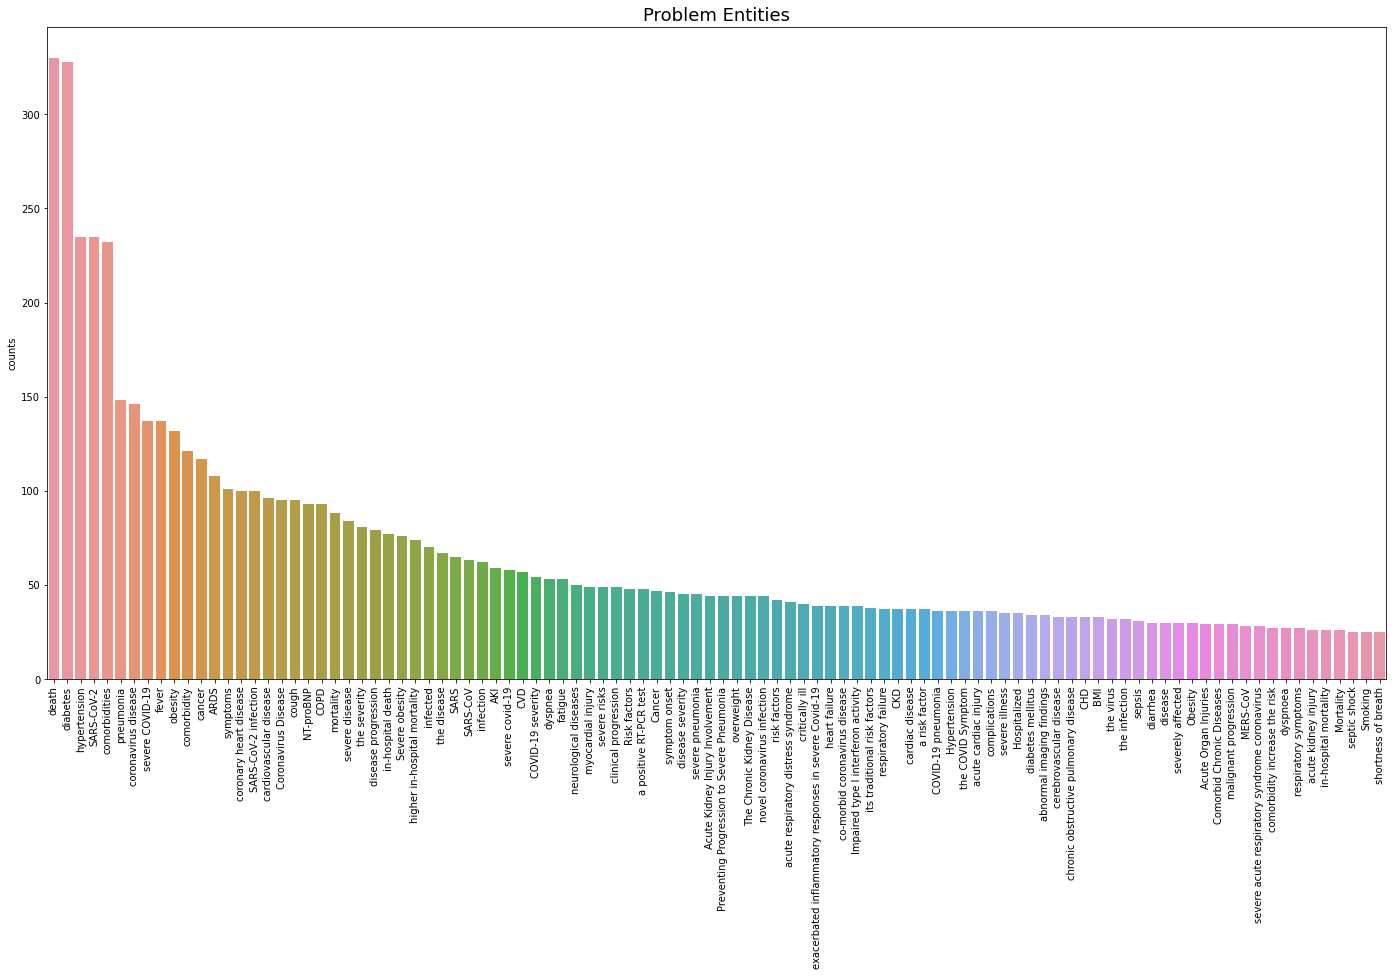

In [44]:
import seaborn as sns
import seaborn as sns
fig, ax = plt.subplots(figsize =(24,12))
chart=sns.barplot(probhist2.index,probhist2['counts'])
chart.set_xticklabels(probhist2.index,rotation=90)
plt.title('Problem Entities',fontsize=18)
plt.show()

You can see that kidney related problems such as "AKI" are well represented in the dataset.

## Find 'Test' entities near the most frequent kidney related 'Problem' entity

In [22]:
problems=pd.DataFrame(problems).reset_index(drop=True)
problems['sectionid']=problems.docid+'-'+problems.section

In [23]:
tests=pd.DataFrame(tests).reset_index(drop=True)
tests['sectionid']=tests.docid+'-'+tests.section

In [24]:
akis=pd.DataFrame(problems[problems['chunks']=='AKI']).reset_index(drop=True)

In [25]:
a=list(set(akis['sectionid']))

In [26]:
akitest=tests[tests['sectionid'].isin(a)]

In [27]:
akicount=pd.DataFrame(akitest.groupby(['chunks'])['label'].count()).reset_index()

akicount=akicount.sort_values(by='label',ascending=False).reset_index(drop=True)
akicount.columns=['chunk','counts']

In [28]:
akicount

,chunk,counts
0,this study,415
1,CI,329
2,the study,231
3,immunoglobulin,214
4,P002,212
...,...,...
14465,Whole slide imaging,1
14466,Wilcoxon Rank sum test,1
14467,Wilcoxon Ranksum,1
14468,Wilcoxon rank-sum tests,1


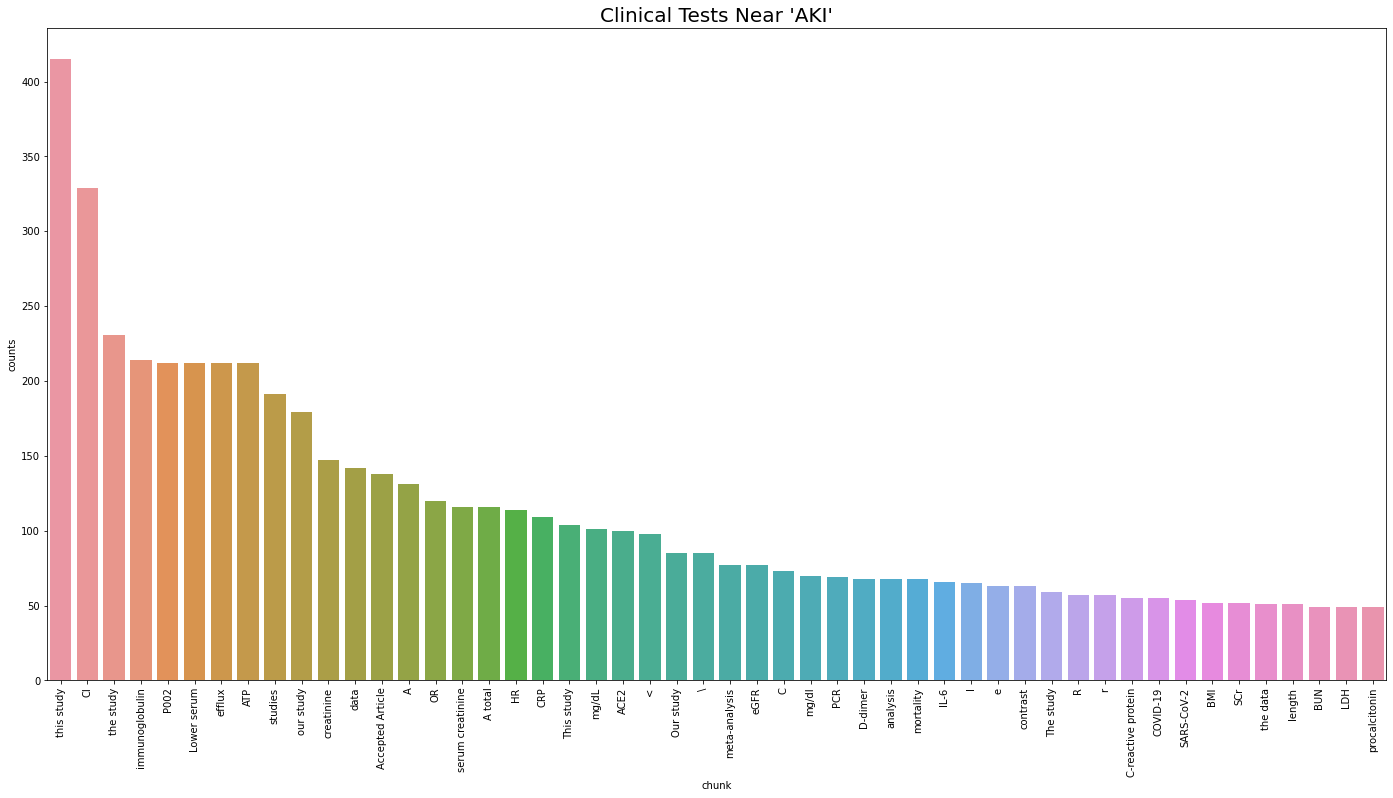

In [29]:
import seaborn as sns
import seaborn as sns
fig, ax = plt.subplots(figsize =(24,12))
chart= sns.barplot(akicount['chunk'][0:50],akicount['counts'][0:50])

chart.set_xticklabels(akicount.chunk,rotation=90)
plt.title("Clinical Tests Near 'AKI'",fontsize=20)


plt.show()

Our clinical tests NER is returning a lot of false positives but we still see that creatinine, CRP, and PCR tests  are well represented in the dataset, appearing in the same section as "AKI". This tells me the information is probably not historical and I will have measurements that I can use for predictions as well as terms to use for topic modelling and text classification.

## Find 'Problem' entities near the most frequent kidney related 'Test' entity

In [30]:
creatins=pd.DataFrame(tests[tests['chunks']=='creatinine']).reset_index(drop=True)
b=list(set(creatins['sectionid']))
creatprob=problems[problems['sectionid'].isin(b)]
creatcount=pd.DataFrame(creatprob.groupby(['chunks'])['label'].count()).reset_index()

creatcount=creatcount.sort_values(by='label',ascending=False).reset_index(drop=True)
creatcount.columns=['chunk','counts']

In [42]:
creatcount

,chunk,counts
0,SARS-CoV-2,550
1,in-stent stenosis,500
2,AKI,435
3,fever,405
4,hypertension,373
...,...,...
30265,chronic HCV infection,1
30266,chronic HCV,1
30267,chronic,1
30268,chromosomal deletions,1


In [31]:
creatcounts=creatcount.iloc[0:50]

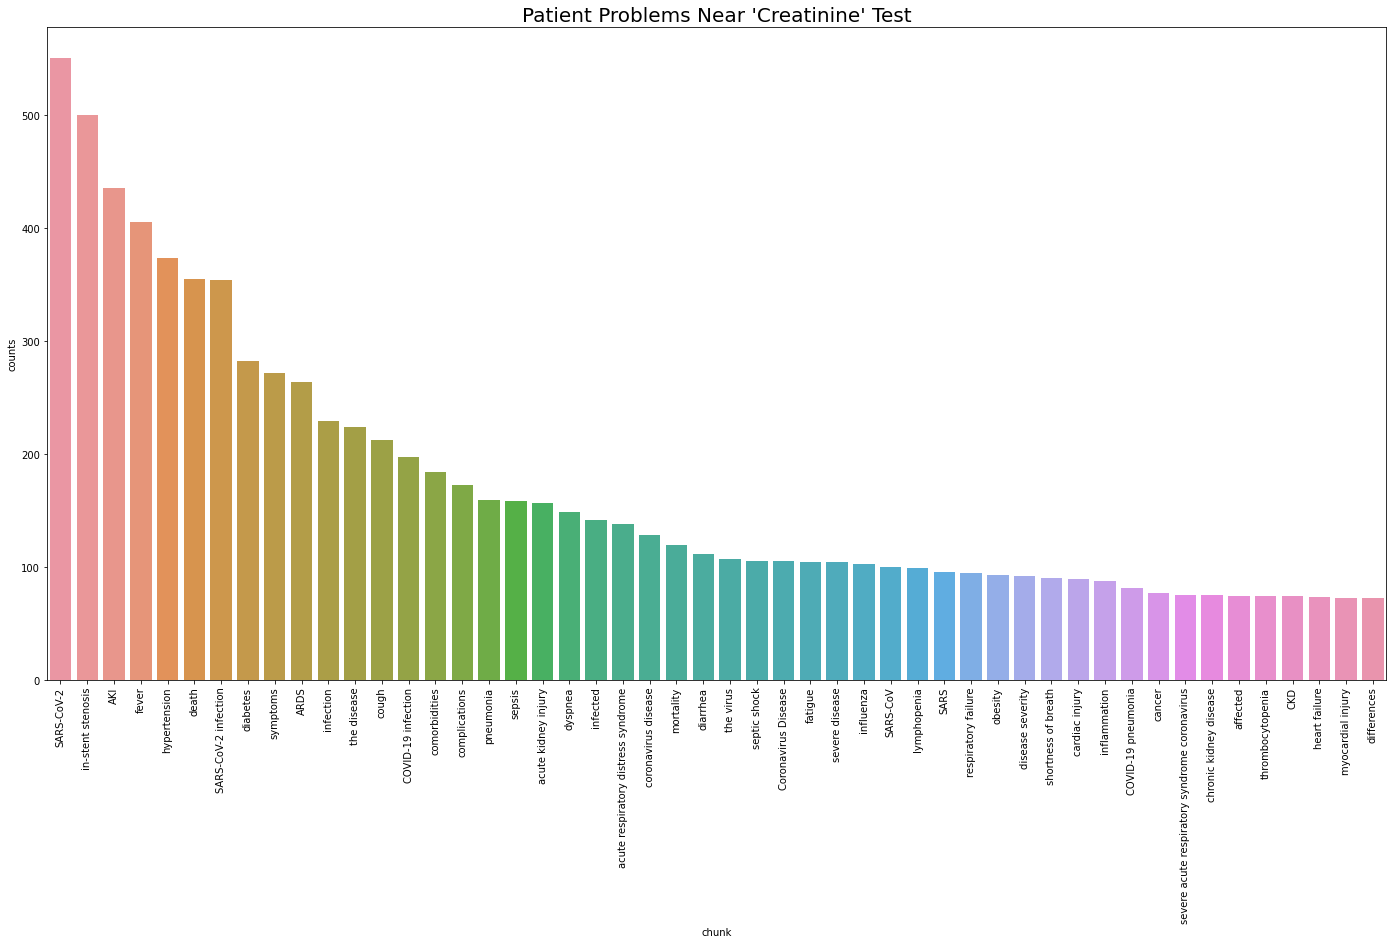

In [32]:
import seaborn as sns
import seaborn as sns
fig, ax = plt.subplots(figsize =(24,12))
chart= sns.barplot(creatcounts.chunk,creatcounts['counts'])

chart.set_xticklabels(creatcounts.chunk,rotation=90)
plt.title("Patient Problems Near 'Creatinine' Test",fontsize=20)


plt.show()

AKI, hypertension, diabetes, and acute kidney injury are all well represented in the dataset, appearing in the same section as "creatinine" tests. This tells me the information is probably not historical and I will have measurements that I can use for predictions as well as terms to use for topic modelling and text classification.

## Frequency of 'patient' mentions in documents

In [33]:
patient=pd.DataFrame(big[(big['token'].str.lower()=='patient')|(big['token'].str.lower()=='patients')]).reset_index(drop=True)

In [35]:
patients=patient.groupby(['docid'])['token'].count()
patients=patients.reset_index()
patients=patients.rename(columns={'token':'counts'})
len(patients)

1568

Text(0.5, 1.0, 'Frequency of Patient Mentions in 1568 Documents')

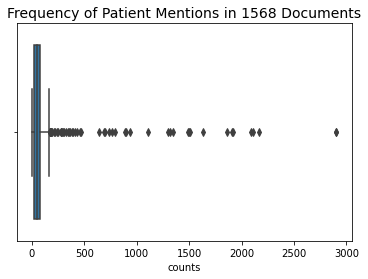

In [41]:
sns.boxplot(patients['counts'])
plt.title('Frequency of Patient Mentions in 1568 Documents',fontsize=14)

## Frequency of 'case report' mentions in documents

In [37]:
case=pd.DataFrame(big[(big['section'].str.lower()=='case report')|(big['section']=='case study')|(big['chunks'].str.lower()=='case report')|(big['chunks'].str.lower()=='case study')|(big['section'].str.lower()=='case reports')|(big['section']=='case studies')|(big['chunks'].str.lower()=='case reports')|(big['chunks'].str.lower()=='case studies')]).reset_index(drop=True)

In [38]:
cases=case.groupby(['docid'])['section'].count()
cases=cases.reset_index()
cases=cases.rename(columns={'section':'counts'})
len(cases)

78

Text(0.5, 1.0, 'Frequency of Case Report/Study Mentions in 78 Documents')

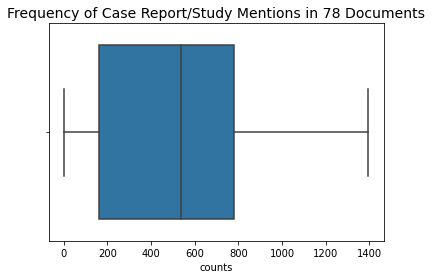

In [40]:
sns.boxplot(cases['counts'])
plt.title('Frequency of Case Report/Study Mentions in 78 Documents',fontsize=14)

78 documents refer to case reports a median of about 550 times (The average document length is about 30,000 words.) I think I will have enough patient data to attempt some predictions.

In [14]:
artlist=kag['Study']
pres=[]
doc=[]
for i in os.listdir('document_parses/pdf_json'):
    with open('document_parses/pdf_json/'+i) as json_file:
        data = json.load(json_file)
        if data['metadata']['title'] in list(artlist):
            for c,j in enumerate(data['body_text']):
            
          
                row=[i,data['metadata']['title'],data['body_text'][c]['section'],data['body_text'][c]['text']]
                doc.append(row)

            pres.append(doc)
                    
            

In [42]:
jsons=[j[0] for i in pres for j in i]
titles=[j[1] for i in pres for j in i]
sections=[j[2].lower() for i in pres for j in i]
text=[j[1].lower()+'.  '+j[2].lower()+'.  '+j[3].lower() for i in pres for j in i]
pres2=pd.DataFrame(None,columns=['jsons','titles','sections','text'])

In [43]:
pres2['jsons']=jsons
pres2['titles']=titles
pres2['section']=sections
pres2['text']=text

In [44]:
pres2.head(1)

,jsons,titles,sections,text,section
0,5111c718f426624c7bcb8f11d7137177f6e85bf3.json,When a nephrology ward becomes a COVID-19 ward...,NaN,when a nephrology ward becomes a covid-19 ward...,


In [47]:
case=pd.DataFrame(pres2[(pd.Series(pres2['section']).str.contains('case report'))|(pd.Series(pres2['section']).str.contains('case study'))|(pd.Series(pres2['text']).str.contains('case report'))|(pd.Series(pres2['text']).str.contains('case study'))|(pd.Series(pres2['section']).str.contains('case reports'))|(pd.Series(pres2['section']).str.contains('case studies'))|(pd.Series(pres2['text']).str.contains('case reports'))|(pd.Series(pres2['text']).str.contains('case studies'))]).reset_index(drop=True)

In [49]:
case.head()

,jsons,titles,sections,text,section
0,d71afe4de25925f16e3832d50dd107e123acbaf8.json,The role of comorbidities and clinical predict...,NaN,the role of comorbidities and clinical predict...,study selection
1,2973b03638396fd8adba65b5e762208b6c493eb0.json,Does comorbidity increase the risk of patients...,NaN,does comorbidity increase the risk of patients...,search strategy and study selection
2,d71afe4de25925f16e3832d50dd107e123acbaf8.json,The role of comorbidities and clinical predict...,NaN,the role of comorbidities and clinical predict...,study selection
3,2973b03638396fd8adba65b5e762208b6c493eb0.json,Does comorbidity increase the risk of patients...,NaN,does comorbidity increase the risk of patients...,search strategy and study selection
4,d71afe4de25925f16e3832d50dd107e123acbaf8.json,The role of comorbidities and clinical predict...,NaN,the role of comorbidities and clinical predict...,study selection


In [50]:
len(case)

40

In [51]:
case['jsons'].nunique()

2

In [52]:
case['titles'].value_counts()

Does comorbidity increase the risk of patients with COVID-19: evidence from meta-analysis                                        20
The role of comorbidities and clinical predictors of severe disease in COVID-19: a systematic review and meta-analysis Emails    20
Name: titles, dtype: int64